In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [64]:
def System(r,t,mu=1.5):

    y = r

    dxdt = t+2*y
    

    return dxdt

In [65]:
mu=1.5
def RungeKutta(f, r, t, h):
    k1 = h * f(r, t,mu)
    k2 = h * f(r + 0.5 * k1,t,mu)
    k3 = h * f(r + 0.5 * k2,t,mu)
    k4 = h * f(r + k3, t ,mu)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6
def IntegratorAdams(f,r0,t,mu):
    #difine el paso
    h = t[1] - t[0]
    #______________________________________
    x = np.zeros_like(t)
    #vx = np.zeros_like(t)
    
    
    #CONDICIONES INICIALES
    x[0] = r0
    
    
    
    #runge khuta
    for i in range(1,6):
        present = x[i-1]
        
        p = RungeKutta(f,present,t[i],h)
        x[i] = x[i-1] + p
        #vx[i] = vx[i-1] + p[1]
        
    #CORRECCIONES
    xc = x.copy()
    #vxc = vx.copy()


    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    
    
    
    for i in range(5,len(t)):
        
        present = x[i-1]
        past_1 = x[i-2]
        past_2 = x[i-3]
        past_3 = x[i-4]
        past_4 = x[i-5]
        #FUNCIONES EVALUADAS EN CADA PASO
        K11 = f(present,t[i-1],mu)
        K12 = f(past_1,t[i-2],mu)
        K13 = f(past_2,t[i-3],mu)
        K14 = f(past_3,t[i-4],mu)
        K15 = f(past_4,t[i-5],mu)
        #ADAMS
        x[i] =   x[i-1] + h*((1901)*K11-(2774)*K12+(2616)*K13-(1274)*K14+(251)*K15)/720
        #vx[i] = vx[i-1] + h*((1901)*K11[1]-(2774)*K12[1]+(2616)*K13[1]-(1274)*K14[1]+(251)*K15[1])/720
        
        xc[i] = x[i]
        #vxc[i] = vx[i]
        
        # Futuro-MULTON
        futuro = x[i]
        Kmulton = f(futuro,t[i],mu)
        
        xc[i] =  xc[i-1] +  h*((475)*Kmulton+(1427)*K11-(798)*K12+(482)*K13-(173)*K14+(27)*K15)/1440
        
        #vxc[i] = vxc[i-1] +  h*((475)*Kmulton[1]+(1427)*K11[1]-(798)*K12[1]+(482)*K13[1]-(173)*K14[1]+(27)*K15[1])/1440
    return x,xc




In [66]:
#odeint(system,r0,t)

In [67]:
############################33
t = np.linspace(0,4,100)
r0 = 0
sol,l = IntegratorAdams(System,r0,t,1.5)


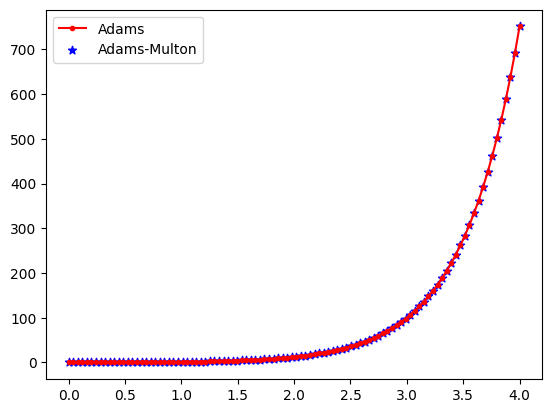

In [71]:
plt.plot(t,l,marker='.',color='r',label="Adams")
plt.scatter(t,sol,marker='*',color='b',label="Adams-Multon")
plt.legend()
